In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Format Data

In [4]:
train_data = pd.read_csv("D:/Github/Bakery_sales_prediction_2025/bakery-sales-prediction-summer-2025-Dataset/train.csv")
train_data = train_data.rename(columns={
    "id": "ID",
    "Datum": "Date",
    "Warengruppe": "Product_Category",
    "Umsatz": "Sales_EUR"
})

weather_data = pd.read_csv("D:/Github/Bakery_sales_prediction_2025/bakery-sales-prediction-summer-2025-Dataset/wetter.csv")

weather_data = weather_data.rename(columns={
    "Datum": "Date",
    "Bewoelkung": "Cloud_Coverage",
    "Temperatur": "Temperature_C",
    "Windgeschwindigkeit": "Wind_Speed_mps",
    "Wettercode": "Weather_Code"
})


## Overview of the Dataset
- First cell: Train.csv
- Second cell: wetter.csv
- Third cell: test.csv

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10460\960163847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Product_Category', y='Sales_EUR', data=train_data,palette='viridis')


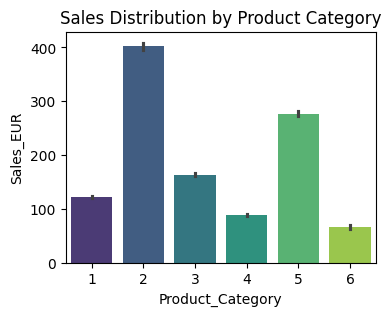

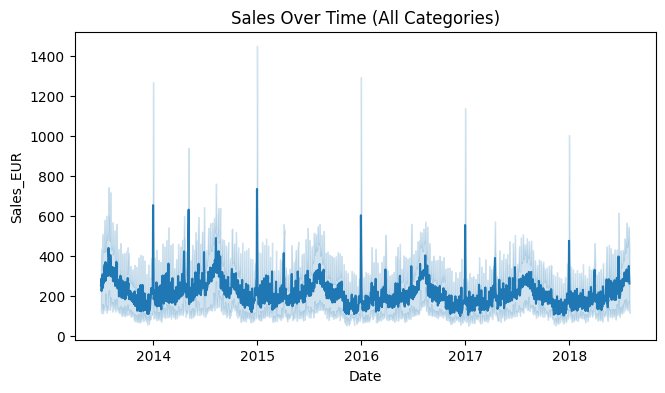

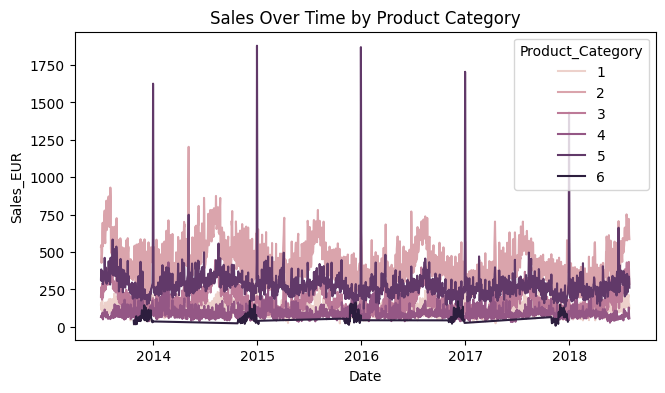

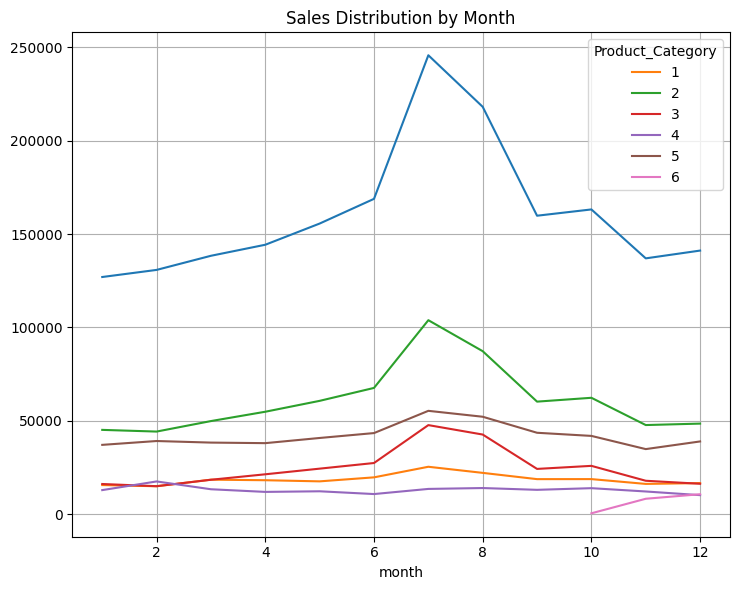

In [36]:
# Barplot sales by product category 

plt.figure(figsize=(4,3))
ax = sns.barplot(x='Product_Category', y='Sales_EUR', data=train_data,palette='viridis')
plt.title('Sales Distribution by Product Category')
plt.show()

# Line plot sales by date (all categories)
train_data['Date'] = pd.to_datetime(train_data['Date'])
plt.figure(figsize=(7.5,4))
sns.lineplot(x='Date', y='Sales_EUR', data=train_data)
plt.title('Sales Over Time (All Categories)')
plt.show()

# Line plot sales by product category
plt.figure(figsize=(7.5,4))
sns.lineplot(x='Date', y='Sales_EUR', hue='Product_Category', data=train_data)
plt.title('Sales Over Time by Product Category')
plt.show()

# line plot sales by month and product category by month

train_data['month'] = train_data['Date'].dt.month
train_data.groupby('month')['Sales_EUR'].sum().plot(kind='line', figsize=(7.5,6))
train_data.groupby(['month','Product_Category'])['Sales_EUR'].sum().unstack().plot(kind='line', figsize=(7.5,6),ax=plt.gca())
plt.title('Sales Distribution by Month')
plt.grid(True)
plt.tight_layout()
plt.show()

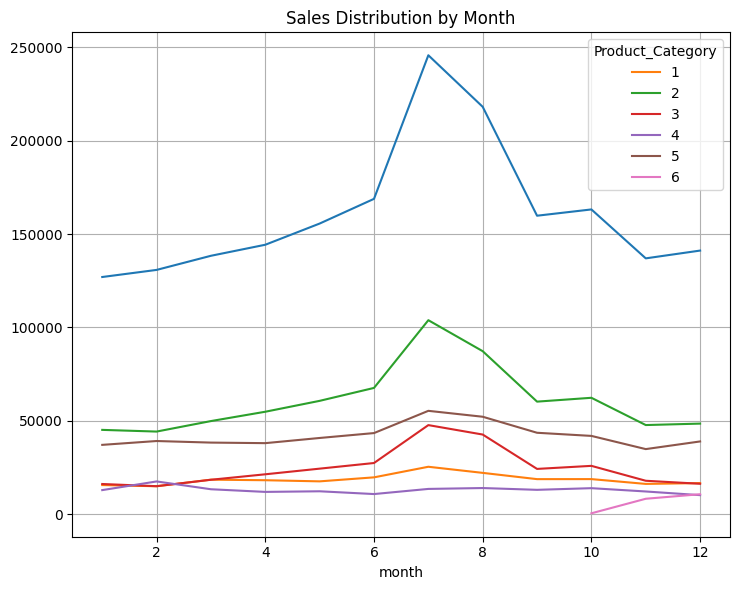

In [14]:
# Thống kê mô tả
print(weather_data.describe())

# Kiểm tra missing values
print(weather_data.isnull().sum())

# Phân phối Weather_Code
print(weather_data['Weather_Code'].value_counts(dropna=False))


       Cloud_Coverage  Temperature_C  Wind_Speed_mps  Weather_Code
count     2591.000000    2601.000000     2601.000000   1932.000000
mean         4.805866      12.099586       11.191080     37.484472
std          2.578299       7.174357        4.124693     27.567144
min          0.000000     -10.250000        3.000000      0.000000
25%          3.000000       6.512500        8.000000     10.000000
50%          6.000000      12.000000       10.000000     28.000000
75%          7.000000      17.825000       14.000000     61.000000
max          8.000000      32.671428       35.000000     95.000000
Date                0
Cloud_Coverage     10
Temperature_C       0
Wind_Speed_mps      0
Weather_Code      669
dtype: int64
Weather_Code
NaN     669
61.0    594
21.0    260
0.0     212
10.0    189
5.0     163
63.0    131
20.0     68
95.0     41
80.0     33
71.0     26
22.0     25
65.0     25
45.0     20
25.0     17
28.0     17
51.0     14
49.0     10
53.0     10
77.0      9
73.0      9
3.0      